# Data Mining : Homework 5
#### Elaheh Toulabi Nejad   |   9631243

<hr style = "border-top: 4px solid #000000 ; border-radius: 3px;">

# 1) Neural Network

## a)

In [111]:
import pandas as pd
import numpy as np

In [112]:
rawdf = pd.read_csv('Flower.csv')
rawdf.head(3)

,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0


## b)

### Missing Valuse :

In [113]:
rawdf.isnull().sum()

X1       0
X2       0
Class    0
dtype: int64

In [114]:
rawdf['Class'].unique()

array([0, 1], dtype=int64)

### Outliers

In [115]:
print("Before Removing Outliers: ",rawdf.shape)
Q1 = rawdf.loc[:, rawdf.columns != 'Class'].quantile(0.25)
Q3 = rawdf.loc[:, rawdf.columns != 'Class'].quantile(0.75)
IQR = Q3 - Q1 
mask = ~((rawdf < (Q1 - 1.5 * IQR)) | (rawdf > (Q3 + 1.5 * IQR))).any(axis=1)
print("#Outliers = ",rawdf[~mask].dropna().shape[0])
print("#Not outliers = ",rawdf.shape[0]-rawdf[~mask].dropna().shape[0])

rawdf= rawdf[mask]
print("After Removing Outliers: ",rawdf.shape)
rawdf.head()

Before Removing Outliers:  (400, 3)
#Outliers =  0
#Not outliers =  400
After Removing Outliers:  (400, 3)


<ipython-input-115-def267d5d543>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((rawdf < (Q1 - 1.5 * IQR)) | (rawdf > (Q3 + 1.5 * IQR))).any(axis=1)
<ipython-input-115-def267d5d543>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  mask = ~((rawdf < (Q1 - 1.5 * IQR)) | (rawdf > (Q3 + 1.5 * IQR))).any(axis=1)


,X1,X2,Class
0,1.204442,3.576114,0
1,0.158710,-1.482171,0
2,0.095247,-1.279955,0
3,0.349178,-2.064380,0
4,0.694150,2.889109,0


### Normalization:

In [116]:
from sklearn.preprocessing import normalize

In [118]:
numericals = pd.DataFrame(rawdf.loc[:, rawdf.columns != 'Class'])
rawdf.loc[:, rawdf.columns != 'Class'] = normalize(numericals, norm='l2',axis=0)
df=rawdf
df.head(3)

,X1,X2,Class
0,0.030601,0.089190,0
1,0.004032,-0.036966,0
2,0.002420,-0.031923,0


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
همانطور که دیده می شود مقدار null وجود ندارد.
    همچنین داده پرت هم نداریم .
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## c)

In [119]:
import matplotlib.pyplot as plt


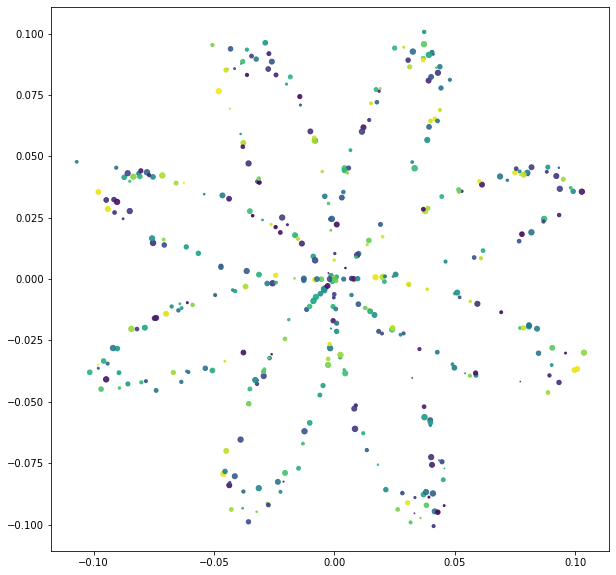

In [120]:
colors = np.random.rand(400)
area = (30 * np.random.rand(400)) 
fig, axes = plt.subplots(1,1,figsize=(10,10))
plt.scatter(df.X1,df.X2, s=area, c=colors, alpha=0.9)
plt.show()


## d)

In [121]:
X = df[['X1','X2']]
y = df['Class']
display(X.head(3))
display(y.head(3))

,X1,X2
0,0.030601,0.089190
1,0.004032,-0.036966
2,0.002420,-0.031923


0    0
1    0
2    0
Name: Class, dtype: int64

## e)

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [124]:
print('Distribution of defferent classes in training data:(%) ')
y = pd.DataFrame(y_train)
a = pd.DataFrame(((y.groupby('Class')['Class'].count())/y_train.shape[0])*100)
a

Distribution of defferent classes in training data:(%) 


,Class
Class,
0,49.0625
1,50.9375


In [125]:
print('Distribution of defferent classes in test data:(%) ')
y = pd.DataFrame(y_test)
b= pd.DataFrame(((y.groupby('Class')['Class'].count())/y_test.shape[0])*100)
b

Distribution of defferent classes in test data:(%) 


,Class
Class,
0,53.75
1,46.25


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">

داده ها را با همان نسبت مطرح شده به تست و آموزش تقسیم می کنیم و توزیع آنها نسبتا برابر است.</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## f)

In [131]:
from sklearn.neural_network import MLPClassifier

In [132]:
nn = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100,100),activation='relu').fit(X_train, y_train)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
یک شبکه عصبی به بیشینه تغداد تکرار 500 برای رسیدن به همگرایی و سه لایه هر کدام با 100 نورون و تابع فعالسازی رلو ساخته و به داده های آموزش train میکنیم. 
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## g)

In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [134]:
y_predicted = nn.predict(X_test)

In [135]:
print("[+] accuracy score\n")
print(accuracy_score(y_test, y_predicted))
print("[+] confusion matrix\n")
print(confusion_matrix(y_test, y_predicted))
print("\n[+] classification report\n")
print(classification_report(y_test, y_predicted))

[+] accuracy score

0.825
[+] confusion matrix

[[34  9]
 [ 5 32]]

[+] classification report

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        43
           1       0.78      0.86      0.82        37

    accuracy                           0.82        80
   macro avg       0.83      0.83      0.82        80
weighted avg       0.83      0.82      0.83        80



<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
ابتدا داده های ورودی را به مدل می دهیم تا تخمین بزند و سپس دقت را به شیوه های مختلف به دست می آوریم.</p>
این دقت 0.825 است و تعداد true ها در ماتریس بیشتر از false هاست.
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## h)

In [138]:
# from utls import plot_prediction
# import utls as utl

def plot_prediction(model, X, y):
    x_min, x_max = X.T.iloc[0, :].min() - 1, X.T.iloc[0, :].max() + 1
    y_min, y_max = X.T.iloc[1, :].min() - 1, X.T.iloc[1, :].max() + 1
    h = 0.01
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
    plt.ylabel('X1')
    plt.xlabel('X2')
    plt.scatter(X.T.iloc[0, :], X.T.iloc[1, :], c=y.iloc[:], cmap=plt.cm.Spectral)



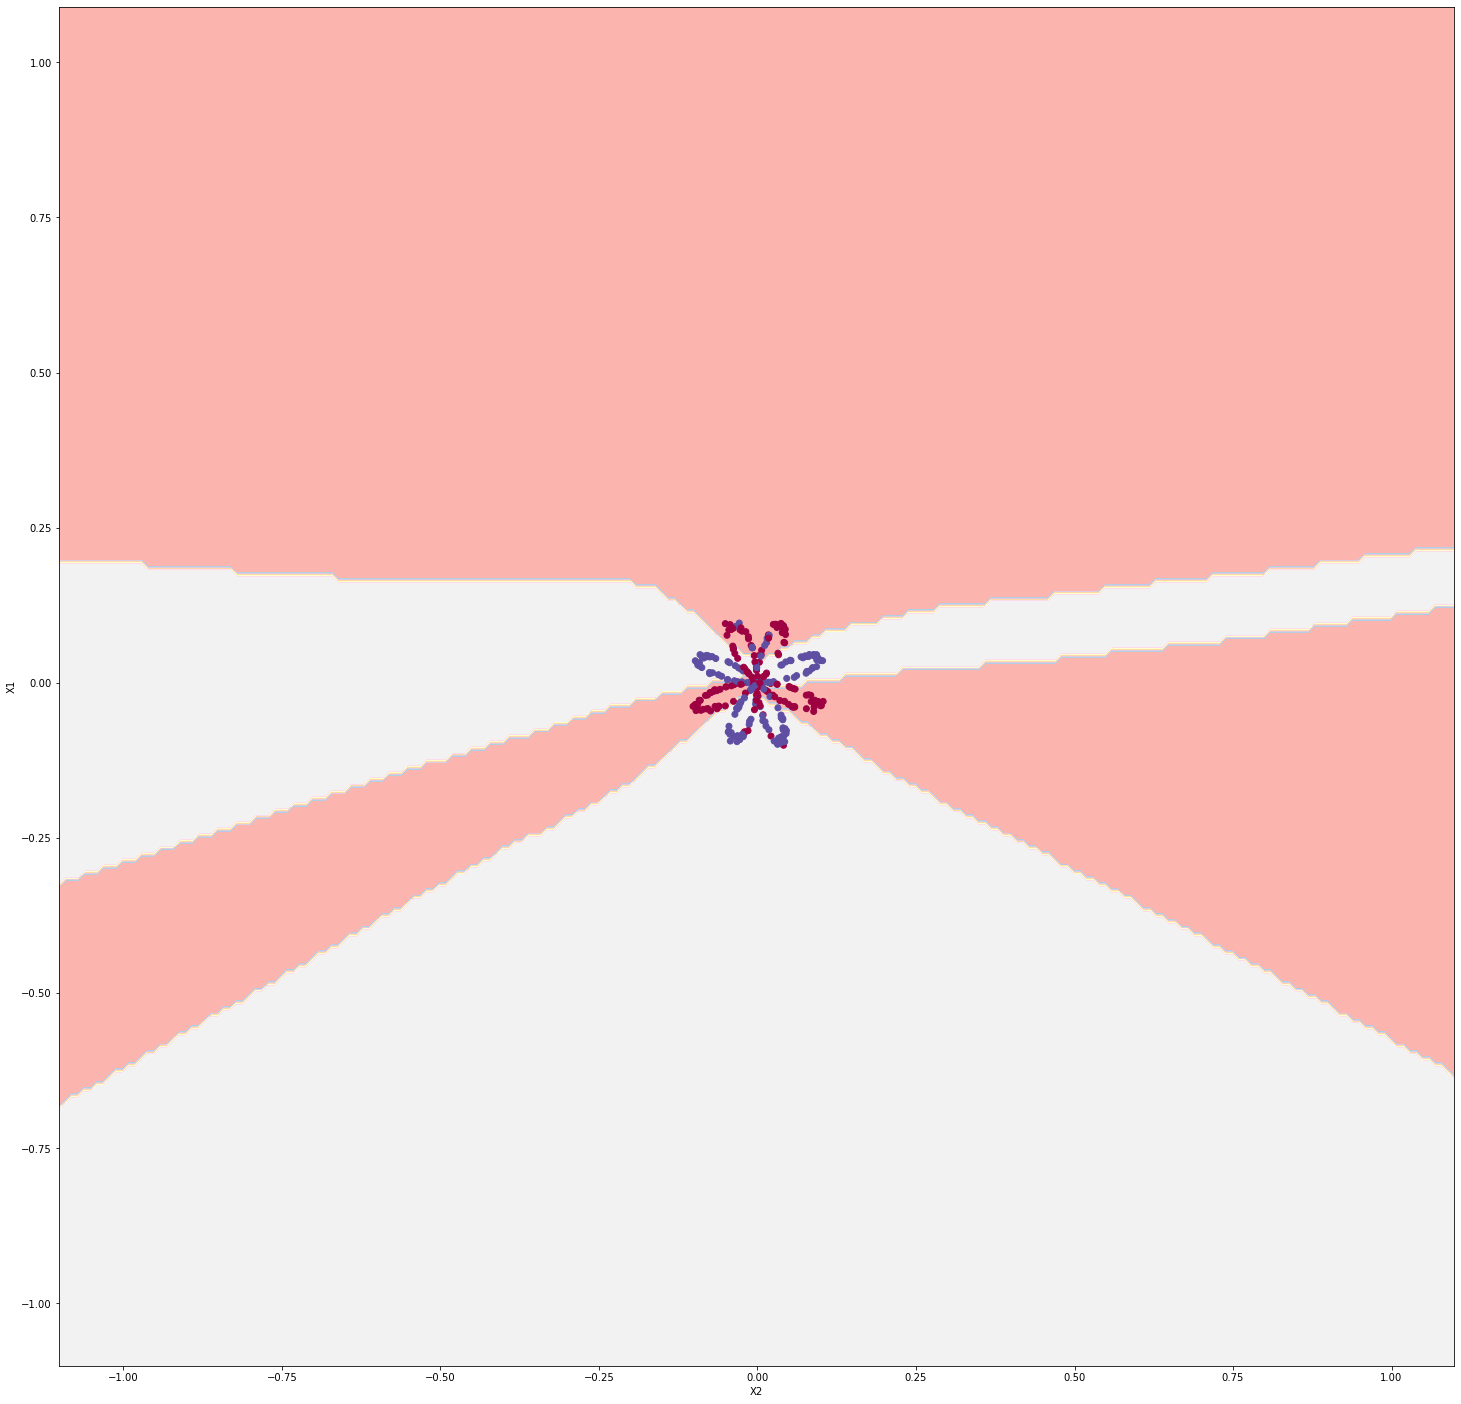

In [140]:
fig, axes = plt.subplots(1,1,figsize=(25,25))

plot_prediction(lambda X_train: nn.predict(X_train), X_train, y_train)

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به کمک تابع عمراه سوال، داده ها و کلاستر آنها را در کنار هم رسم کرده ایم.
آنچه دیده می شود گاهی داده های قرمز در کلاستر مربوط به رنگ بنفش قرار دارند و اینها موجب خطاست.

هر رنگ پس زمینه پلات فوق یک کلاستر را نمایش می دهد.
اکثر داده های موحود در رنگ کرم بنفش هستند یعنی مربوط به یک خوشه هستند و همینطور برای رنگ صورتی.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


## i)

### Activation Function :

In [145]:
# activation = relu  

nn0 = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100,100),activation='relu').fit(X_train, y_train)
y_predicted0 = nn0.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predicted0))

[+] accuracy score = 
0.8375


In [146]:
# activation = identity  
nn1 = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100,100),activation='identity').fit(X_train, y_train)
y_predicted1 = nn1.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predicted1))

[+] accuracy score = 
0.5125


In [147]:
# activation = logistic
nn2 = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100,100),activation='logistic').fit(X_train, y_train)
y_predicted2 = nn2.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predicted2))

[+] accuracy score = 
0.4625


In [148]:
# activation = tanh
nn3 = MLPClassifier(max_iter=500, hidden_layer_sizes=(100,100,100),activation='tanh').fit(X_train, y_train)
y_predicted3 = nn3.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predicted3))

[+] accuracy score = 
0.5375


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
بهترین نتیجه با رلو حاصل می شود پس آن را نگه میداریم.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### Max Iteration :

In [149]:
mis = []
max = 0
maxmi=0
for mi in range(20,1000,30):
    nnmi = MLPClassifier(max_iter=mi, hidden_layer_sizes=(100,100,100),activation='relu').fit(X_train, y_train)
    y_predictedmi = nnmi.predict(X_test)
    prec=accuracy_score(y_test, y_predictedmi)
    mis.append(prec)
    if prec > max :
        max=prec
        maxmi=mi
#     print("[+] accuracy score = ")
#     print(accuracy_score(y_test, y_predictedmi))

F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (80) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  warnings.warn(
F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: Con

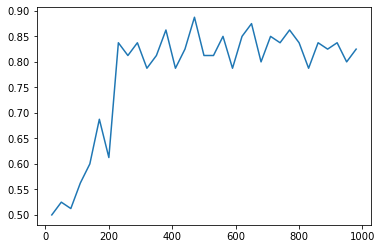

In [150]:
plt.plot(range(20,1000,30),mis)

In [151]:
print('Using ReLU Best Accuracy happened for max_iter = ',maxmi,'  ->  ',max)

Using ReLU Best Accuracy happened for max_iter =  470   ->   0.8875


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
بهترین عدد برای 470 حاصل می شود پس نگه میداریم</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### Hidden Layer Sizes(#layers) :

In [152]:
nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.5625


In [153]:
nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,100,),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.7875


F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(


In [154]:
nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,100,100),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.825


F:\Anaconda\envs\DM\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (470) reached and the optimization hasn't converged yet.
  warnings.warn(


In [155]:
#best yet
nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,100,100,100),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.825


In [156]:

nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,100,100,100,100),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.7875


In [157]:
nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,100,100,100,100,100),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.8375


In [158]:
nnlyr = MLPClassifier(max_iter=470, hidden_layer_sizes=(100,100,100,100,100,100,100),activation='relu').fit(X_train, y_train)
y_predictedlyr = nnlyr.predict(X_test)
print("[+] accuracy score = ")
print(accuracy_score(y_test, y_predictedlyr))

[+] accuracy score = 
0.8375


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
بهترین نتیجه با 6لایه حاصل می شود پس آن را نگه میداریم.
</p>

<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


### Hidden Layer Size (#neurons in each layer)

In [160]:
nns = []
nmax = 0
nmaxmi=0
for nnc in range(10,1000,100):
    nnnn = MLPClassifier(max_iter=470, hidden_layer_sizes=(nnc,nnc,nnc,nnc,nnc,nnc),activation='relu').fit(X_train, y_train)
    y_predictednn = nnnn.predict(X_test)
    prec=accuracy_score(y_test, y_predictednn)
    nns.append(prec)
    if prec > nmax :
        nmax=prec
        nmaxmi=mi



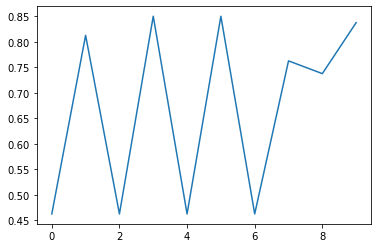

In [163]:
plt.plot(nns)

In [164]:
print('MAX : ',nmax ,' -> ',nmaxmi)

MAX :  0.85  ->  980


# BEST :


In [174]:
final = MLPClassifier(max_iter=470, hidden_layer_sizes=(980,980,980,980,980,980),activation='relu').fit(X_train, y_train)
y_predictedfinal = final.predict(X_test)
prec=accuracy_score(y_test, y_predictedfinal)

In [175]:
print('final precision =',prec)

final precision = 0.85


<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">

<p style =" direction:rtl;text-align:right;">
به نظر می زسد تابع فعالسازی بیشترین اثر را دارد.
البته تعداد لایه ها و نرون ها هم ثطعا اثر به سزایی دارد اما بیشترین تغییر به ازای تئابع مختلف حاصل شد.</p>
همانطور که در شکل دیده می شود خوشه بندی داده ها با کیفیت قابل قبولی رخ داده است.
<hr style = "border-top: 3px solid #000000 ; border-radius: 3px;">


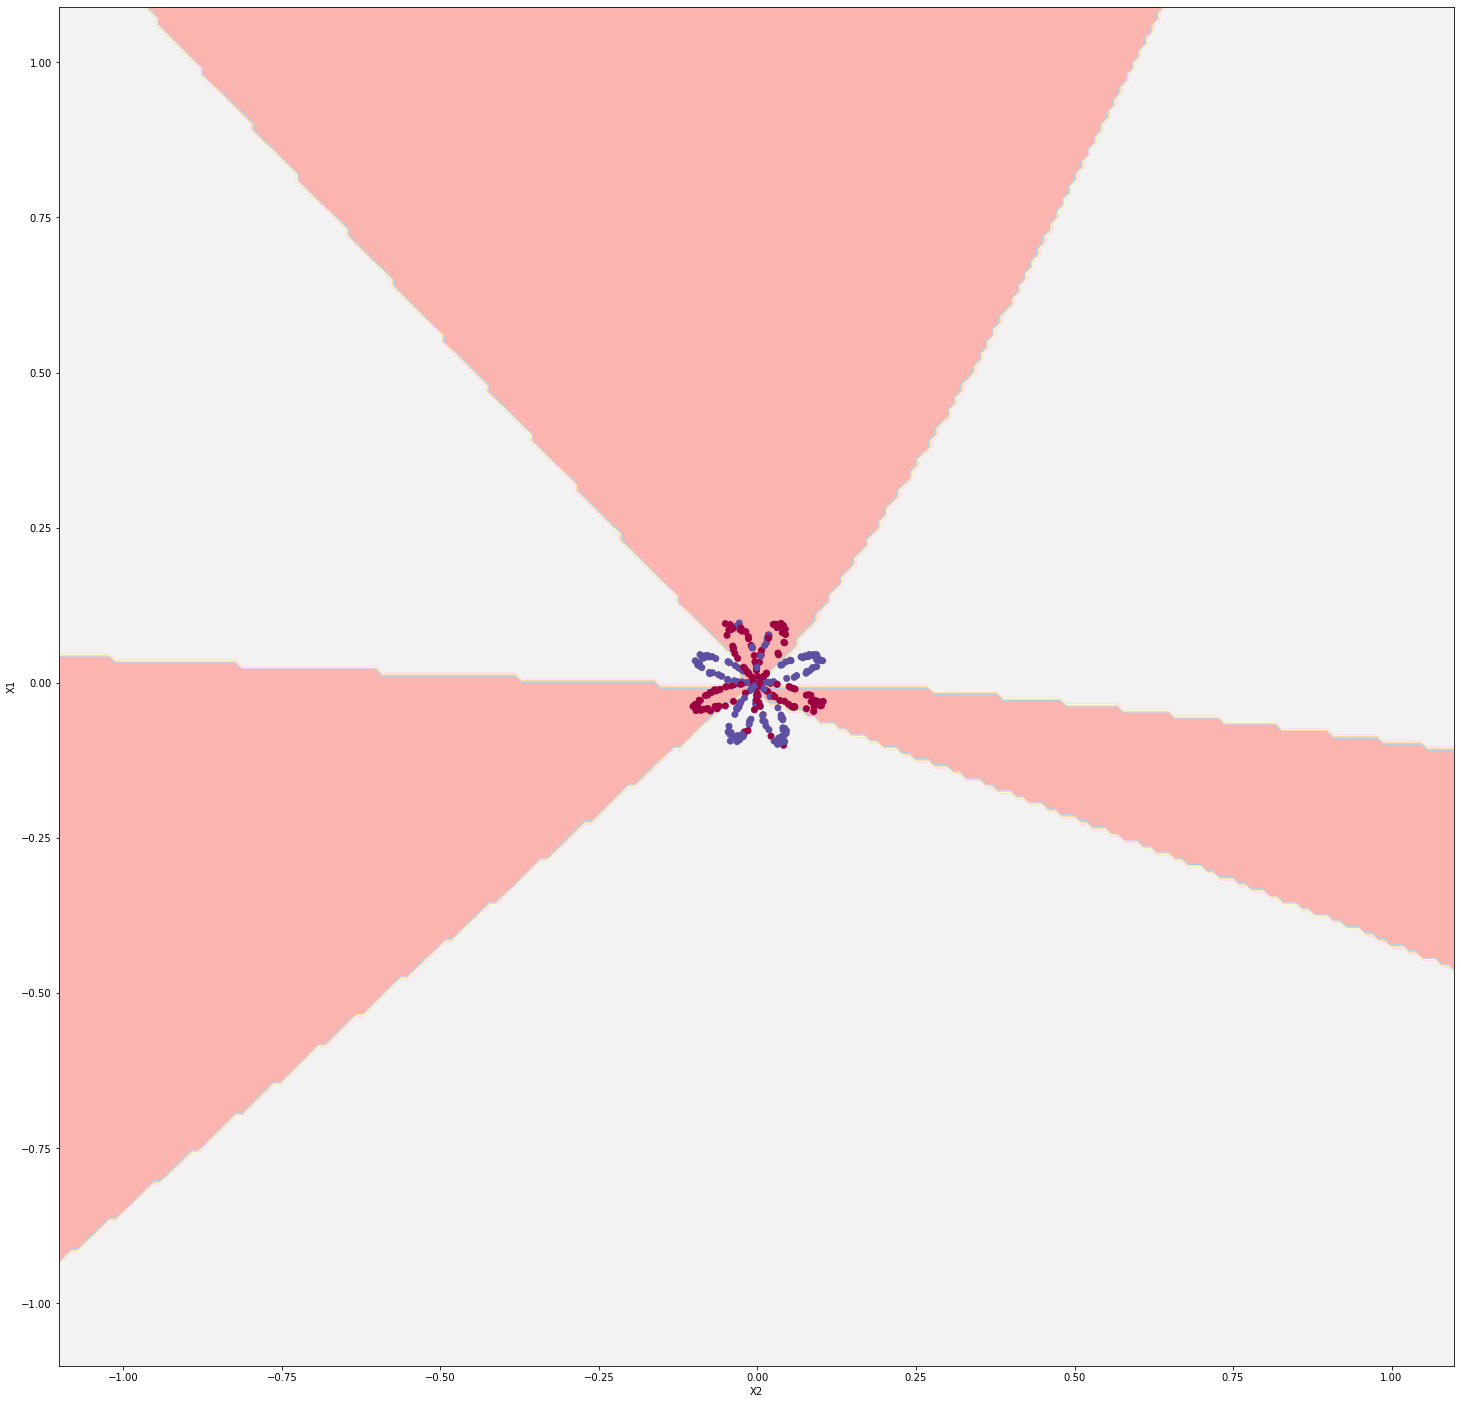

In [176]:
fig, axes = plt.subplots(1,1,figsize=(25,25))

plot_prediction(lambda X_train: final.predict(X_train), X_train, y_train)